In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("Happiness_index.csv")
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [3]:
pd.set_option("display.max_rows",None)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [5]:
df.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

In [6]:
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

# Statistical Summary

In [7]:
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


we will check outliers and skewness seprately in further steps


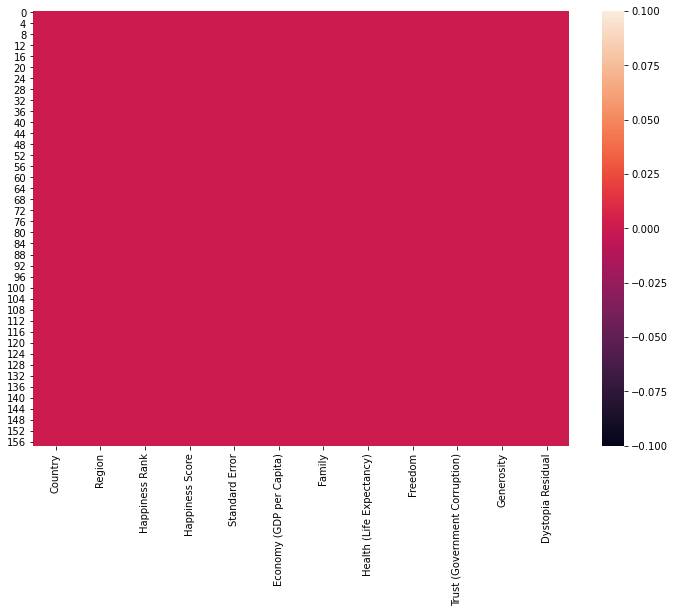

In [8]:
plt.figure(figsize=(12,8))
sns.heatmap(df.isnull())
plt.show()

No Null values are present in the data set

In [9]:
df["Happiness Score"].unique()

array([7.587, 7.561, 7.527, 7.522, 7.427, 7.406, 7.378, 7.364, 7.286,
       7.284, 7.278, 7.226, 7.2  , 7.187, 7.119, 6.983, 6.946, 6.94 ,
       6.937, 6.901, 6.867, 6.853, 6.81 , 6.798, 6.786, 6.75 , 6.67 ,
       6.611, 6.575, 6.574, 6.505, 6.485, 6.477, 6.455, 6.411, 6.329,
       6.302, 6.298, 6.295, 6.269, 6.168, 6.13 , 6.123, 6.003, 5.995,
       5.987, 5.984, 5.975, 5.96 , 5.948, 5.89 , 5.889, 5.878, 5.855,
       5.848, 5.833, 5.828, 5.824, 5.813, 5.791, 5.77 , 5.759, 5.754,
       5.716, 5.709, 5.695, 5.689, 5.605, 5.589, 5.548, 5.477, 5.474,
       5.429, 5.399, 5.36 , 5.332, 5.286, 5.268, 5.253, 5.212, 5.194,
       5.192, 5.14 , 5.129, 5.124, 5.123, 5.102, 5.098, 5.073, 5.057,
       5.013, 5.007, 4.971, 4.959, 4.949, 4.898, 4.885, 4.876, 4.874,
       4.867, 4.857, 4.839, 4.8  , 4.788, 4.786, 4.739, 4.715, 4.694,
       4.686, 4.681, 4.677, 4.642, 4.633, 4.61 , 4.571, 4.565, 4.55 ,
       4.518, 4.517, 4.514, 4.512, 4.507, 4.436, 4.419, 4.369, 4.35 ,
       4.332, 4.307,

<AxesSubplot:>

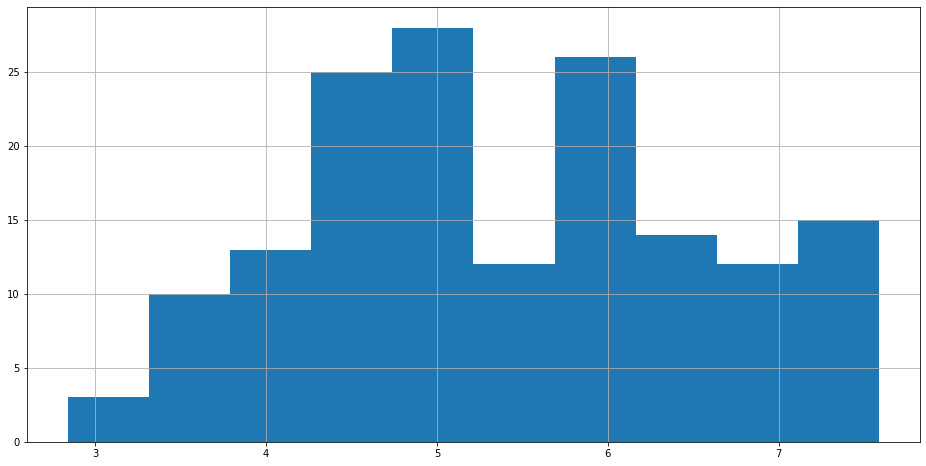

In [10]:
plt.figure(figsize=(16,8))
df["Happiness Score"].hist(grid=True)

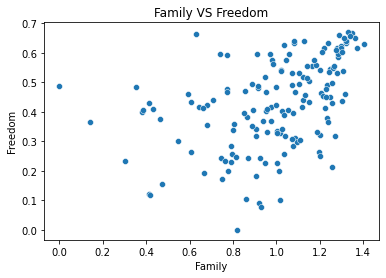

In [16]:
sns.scatterplot(x="Family",y="Freedom",data=df)
plt.title("Family VS Freedom")
plt.show()

# Checking Correlation

In [27]:
cor=df.corr()
cor

,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Region,1.000000,0.213773,-0.176791,-0.022600,-0.260139,-0.168533,-0.357508,0.092567,0.165040,0.273557,-0.057276
Happiness Rank,0.213773,1.000000,-0.992105,0.158516,-0.785267,-0.733644,-0.735613,-0.556886,-0.372315,-0.160142,-0.521999
Happiness Score,-0.176791,-0.992105,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Standard Error,-0.022600,0.158516,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
Economy (GDP per Capita),-0.260139,-0.785267,0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,-0.168533,-0.733644,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health (Life Expectancy),-0.357508,-0.735613,0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,0.092567,-0.556886,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust (Government Corruption),0.165040,-0.372315,0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105
Generosity,0.273557,-0.160142,0.180319,-0.088439,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000,-0.101301


In [72]:
df.drop("Country",axis=1,inplace=True)

In [73]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["Region"]=le.fit_transform(df["Region"])

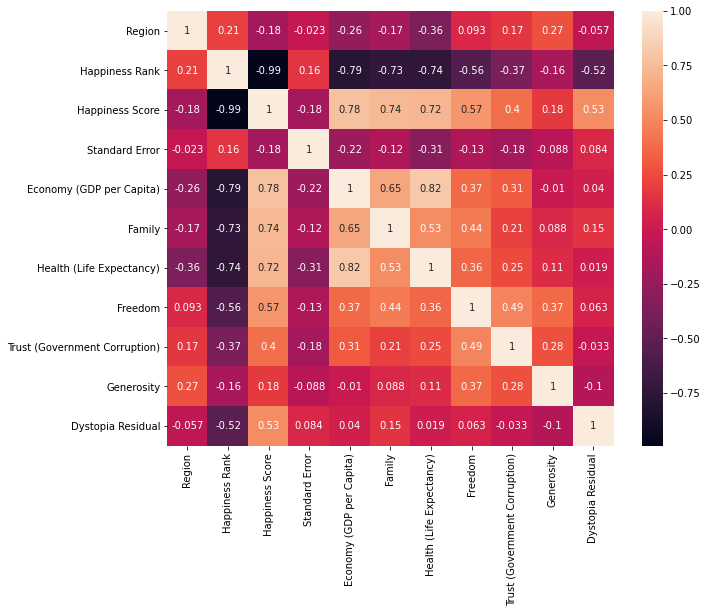

In [74]:
plt.figure(figsize=(10,8))
sns.heatmap(cor,annot=True)
plt.show()

 Let's print the correlation values of independent varaibale with target variable in sorted form.

In [76]:
cor_matrix=df.corr()
cor_matrix["Happiness Score"].sort_values(ascending=False)

Happiness Score                  1.000000
Economy (GDP per Capita)         0.780966
Family                           0.740605
Health (Life Expectancy)         0.724200
Freedom                          0.568211
Dystopia Residual                0.530474
Trust (Government Corruption)    0.395199
Generosity                       0.180319
Region                          -0.176791
Standard Error                  -0.177254
Happiness Rank                  -0.992105
Name: Happiness Score, dtype: float64

# Lets check the data distribution among all the columns

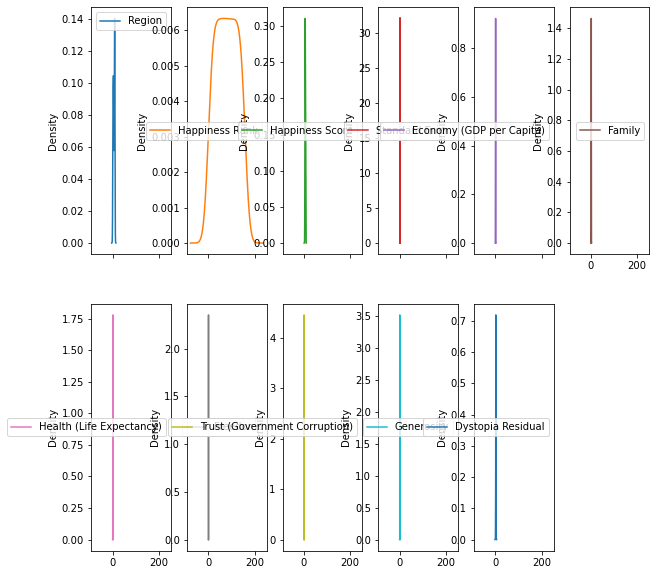

In [77]:
df.plot(kind="density",subplots=True,layout=(2,6),figsize=(10,10))
plt.show()

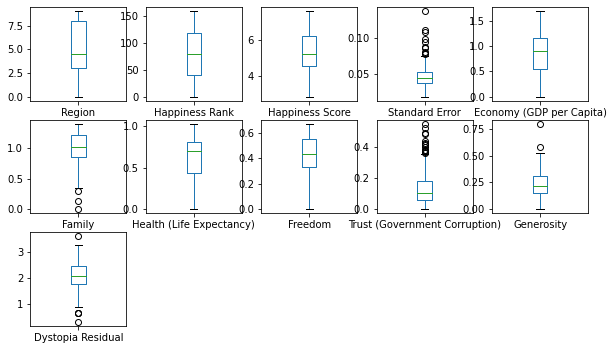

In [79]:
df.plot(kind="box",subplots=True,layout=(5,5),figsize=(10,10))
plt.show()

In [80]:
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1
#Removing outliers using IQR Method
df_new=df[~((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).any(axis=1)]

In [81]:
df_new.shape

(126, 11)

In [82]:
x=df_new.drop(["Happiness Score"],axis=1)
y=df_new["Happiness Score"]

In [83]:
x.skew()

Region                           0.027379
Happiness Rank                  -0.018211
Standard Error                   0.478133
Economy (GDP per Capita)        -0.418441
Family                          -0.704866
Health (Life Expectancy)        -0.755316
Freedom                         -0.392531
Trust (Government Corruption)    1.082193
Generosity                       0.689359
Dystopia Residual                0.159596
dtype: float64

In [89]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.linear_model import LinearRegression
maxAcc=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    lg=LinearRegression()
    lg.fit(x_train,y_train)
    pred=lg.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print("Best accuracy score is",maxAcc,"on random_state",maxRS)

Best accuracy score is 0.9999999479905426 on random_state 133


# Creating train_test_split¶

In [90]:
x_train,y_train,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=133)

In [91]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()
lr.fit(x_train,y_train)
pred=lr.predict(x_test)
print(r2_score(y_test,pred))
print(mean_squared_error(y_test,pred))
print(mean_absolute_error(y_test,pred))

-0.873748612825147
2.4839805244581177
1.2425512215627477


In [94]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pred=dtr.predict(x_test)
print(r2_score(y_test,pred))
print(mean_squared_error(y_test,pred))
print(mean_absolute_error(y_test,pred))

-0.8635557483992109
2.470468105263158
1.2429473684210524


In [95]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
pred=rf.predict(x_test)
print(r2_score(y_test,pred))
print(mean_squared_error(y_test,pred))
print(mean_absolute_error(y_test,pred))

-0.8597904618336227
2.4654765613421072
1.2416426315789475


In [96]:
from sklearn.neighbors import KNeighborsRegressor
kn=KNeighborsRegressor()
kn.fit(x_train,y_train)
pred=kn.predict(x_test)
print(r2_score(y_test,pred))
print(mean_squared_error(y_test,pred))
print(mean_absolute_error(y_test,pred))

-0.8289603766399565
2.424605907368421
1.2410526315789474


In [97]:
from sklearn.model_selection import cross_val_score

In [98]:
scr=cross_val_score(lg,x,y,cv=5)
print("Cross validation Score of Linear Regression",scr.mean())

Cross validation Score of Linear Regression 0.9999967418663946


In [99]:
scr=cross_val_score(dtr,x,y,cv=5)
print("Cross validation Score of Decision Tree Classifier",scr.mean())

Cross validation Score of Decision Tree Classifier -2.5081268951438136


In [118]:
scr=cross_val_score(rf,x,y,cv=5)
print("Cross validation Score of Random Forest Regressor",scr.mean())

Cross validation Score of Random Forest Regressor -3.006573815191167


In [119]:
scr=cross_val_score(kn,x,y,cv=5)
print("Cross validation Score of Kneighbors Regressor",scr.mean())

Cross validation Score of Kneighbors Regressor -2.4451090459292546


# Hyper parameter_tuning

In [102]:
from sklearn.model_selection import GridSearchCV

In [108]:
#creating parameter list to pass in GridSearchCV

parameters={"max_depth":np.arange(2,15),
           "criterion":["mse", "friedman_mse"]}

In [109]:
GCV=GridSearchCV(DecisionTreeRegressor(),parameters,cv=5) #tuning decisiontreeclassifier

In [110]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['mse', 'friedman_mse'],
                         'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])})

In [111]:
GCV.best_params_

{'criterion': 'friedman_mse', 'max_depth': 10}

In [114]:
mod=DecisionTreeRegressor(criterion="friedman_mse",max_depth=10,random_state=133)

mod.fit(x_train,y_train)
pred=mod.predict(x_test)
print(r2_score(y_test,pred)*100)

-86.24444967067934


# Saving the Model

In [117]:
import joblib
joblib.dump(mod,"WorldHappinessreport1.pkl")

['WorldHappinessreport1.pkl']